<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [62]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import distplot
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [63]:
sat_filepath = '/Users/tlee010/desktop/DSI-SF-2-timdavidlee/datasets/state_sat_scores/sat_scores.csv'
with open(sat_filepath,'r') as f:
    reader = csv.reader(f)
    rows = [rows for rows in reader]
pprint(rows)

sat_dictionary = {j: [float(k[i]) if k[i].isdigit() else k[i] for k in rows[1:]] for i,j in enumerate(rows[0])}
pprint(sat_dictionary)


[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [64]:
sd = pd.DataFrame(sat_dictionary)

sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
Math      52 non-null float64
Rate      52 non-null float64
State     52 non-null object
Verbal    52 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [65]:
sd[sd['State']=='CT']

,Math,Rate,State,Verbal
0,510.0,82.0,CT,509.0


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [66]:
sd.head(10)

,Math,Rate,State,Verbal
0,510.0,82.0,CT,509.0
1,513.0,81.0,NJ,499.0
2,515.0,79.0,MA,511.0
3,505.0,77.0,NY,495.0
4,516.0,72.0,NH,520.0
5,499.0,71.0,RI,501.0
6,499.0,71.0,PA,500.0
7,506.0,69.0,VT,511.0
8,500.0,69.0,ME,506.0
9,501.0,68.0,VA,510.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [67]:
sd.describe()
data_dictionary = { 'Shape': [4, 52]
                    ,'fields':{
                                'Math':{
                                        'Description': 'these are math scores of high school students'
                                        , 'Type':'float'
                            
                                        }
                                ,'Verbal':{
                                        'Description': 'these are verbal scores of high school students'
                                        , 'Type':'float'            
                                        }
                                , 'Rate':{
                                            'Description': 'rate of study'
                                        , 'Type':'float'
                                        }
                            }
                  }
from pprint import pprint
pprint(data_dictionary)

{'Shape': [4, 52],
 'fields': {'Math': {'Description': 'these are math scores of high school students',
                     'Type': 'float'},
            'Rate': {'Description': 'rate of study', 'Type': 'float'},
            'Verbal': {'Description': 'these are verbal scores of high school students',
                       'Type': 'float'}}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

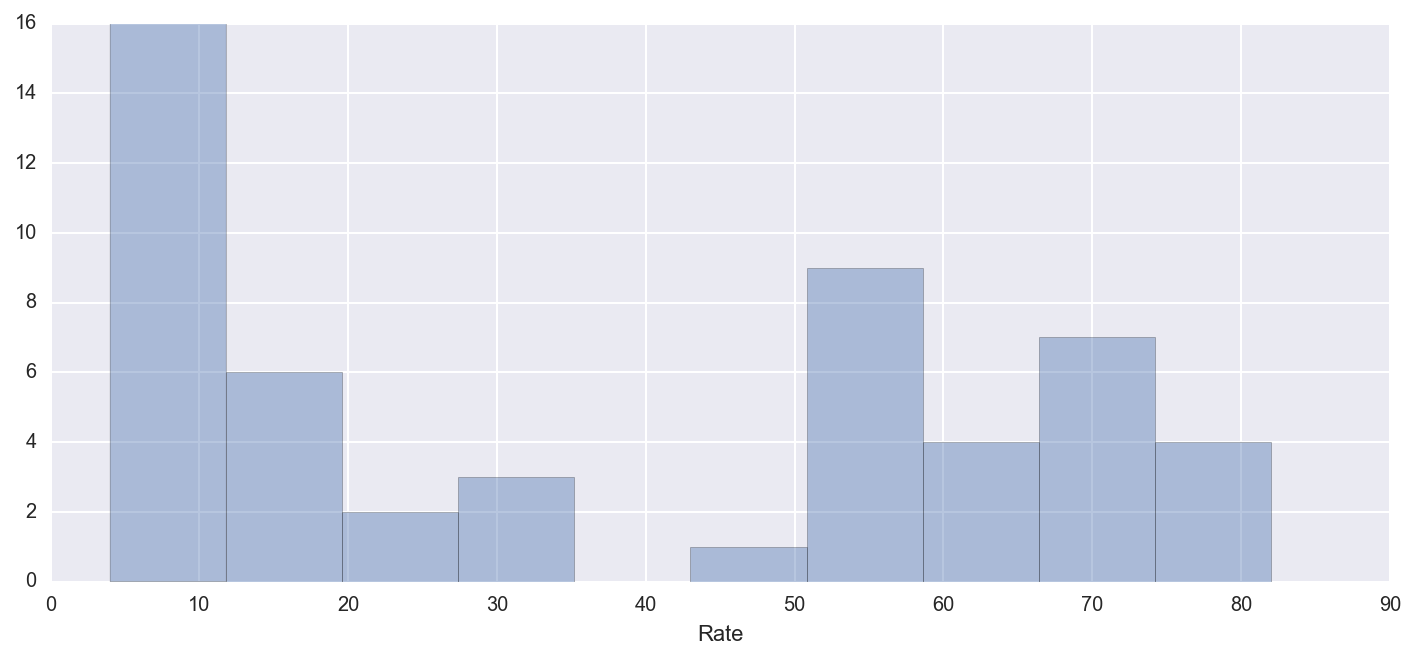

In [72]:
fig = plt.figure(figsize =(12,5))
ax = fig.gca()
ax = distplot(sd['Rate'],kde=False,bins=10)
plt.show()

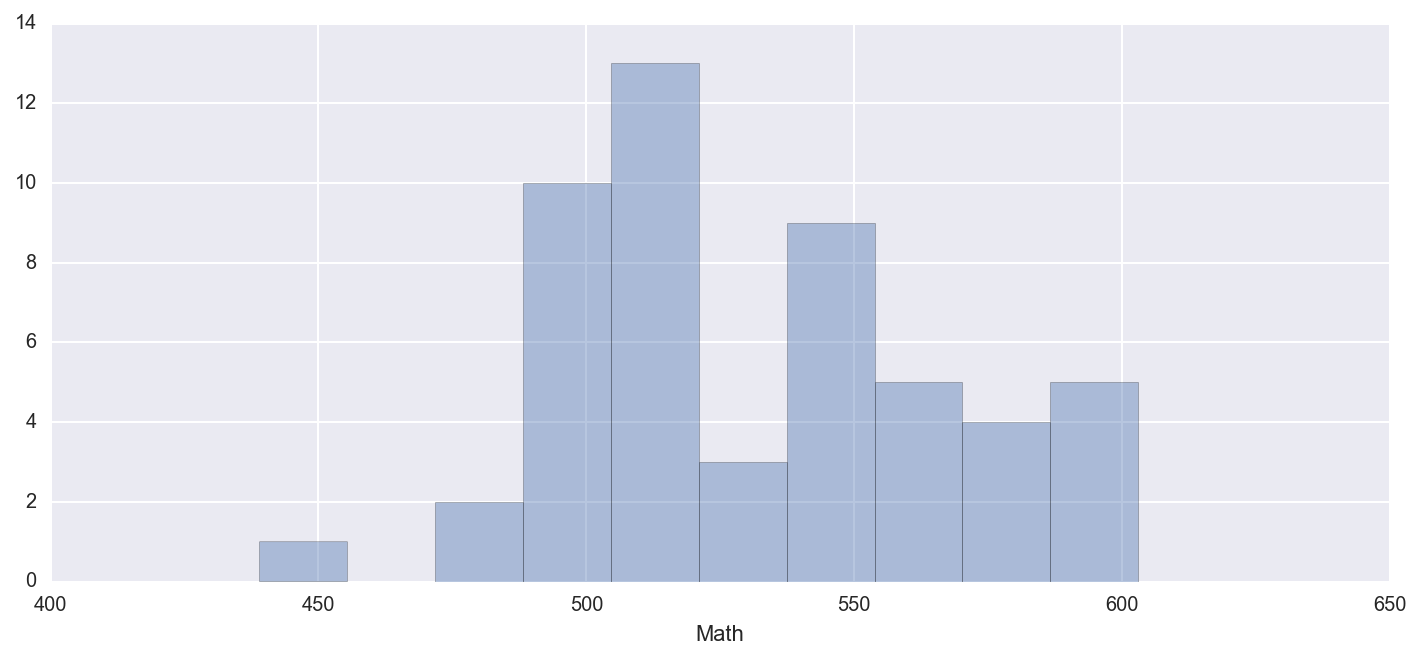

In [73]:
fig = plt.figure(figsize = [12,5])
ax = fig.gca()
ax = distplot(sd['Math'],kde=False,bins=10)
plt.show()



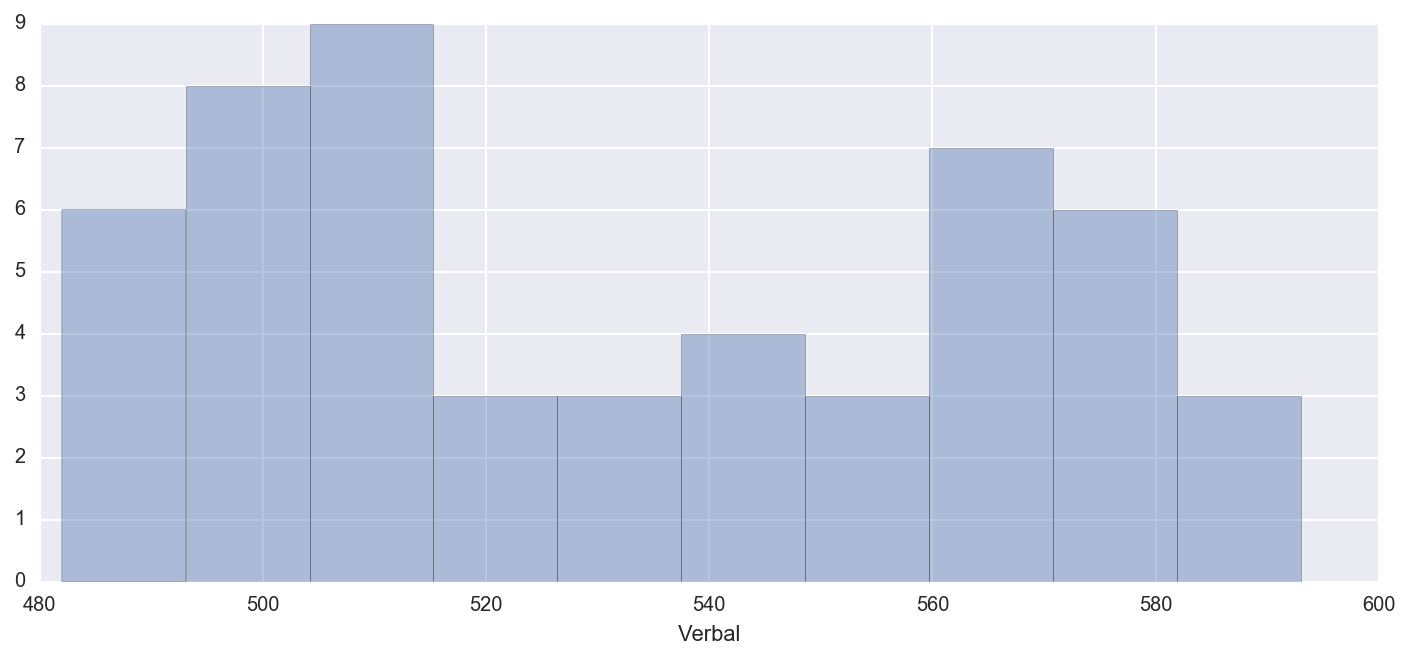

In [75]:
fig = plt.figure(figsize = [12,5])
ax = fig.gca()
ax = distplot(sd['Verbal'],kde=False,bins=10)
plt.show()



### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

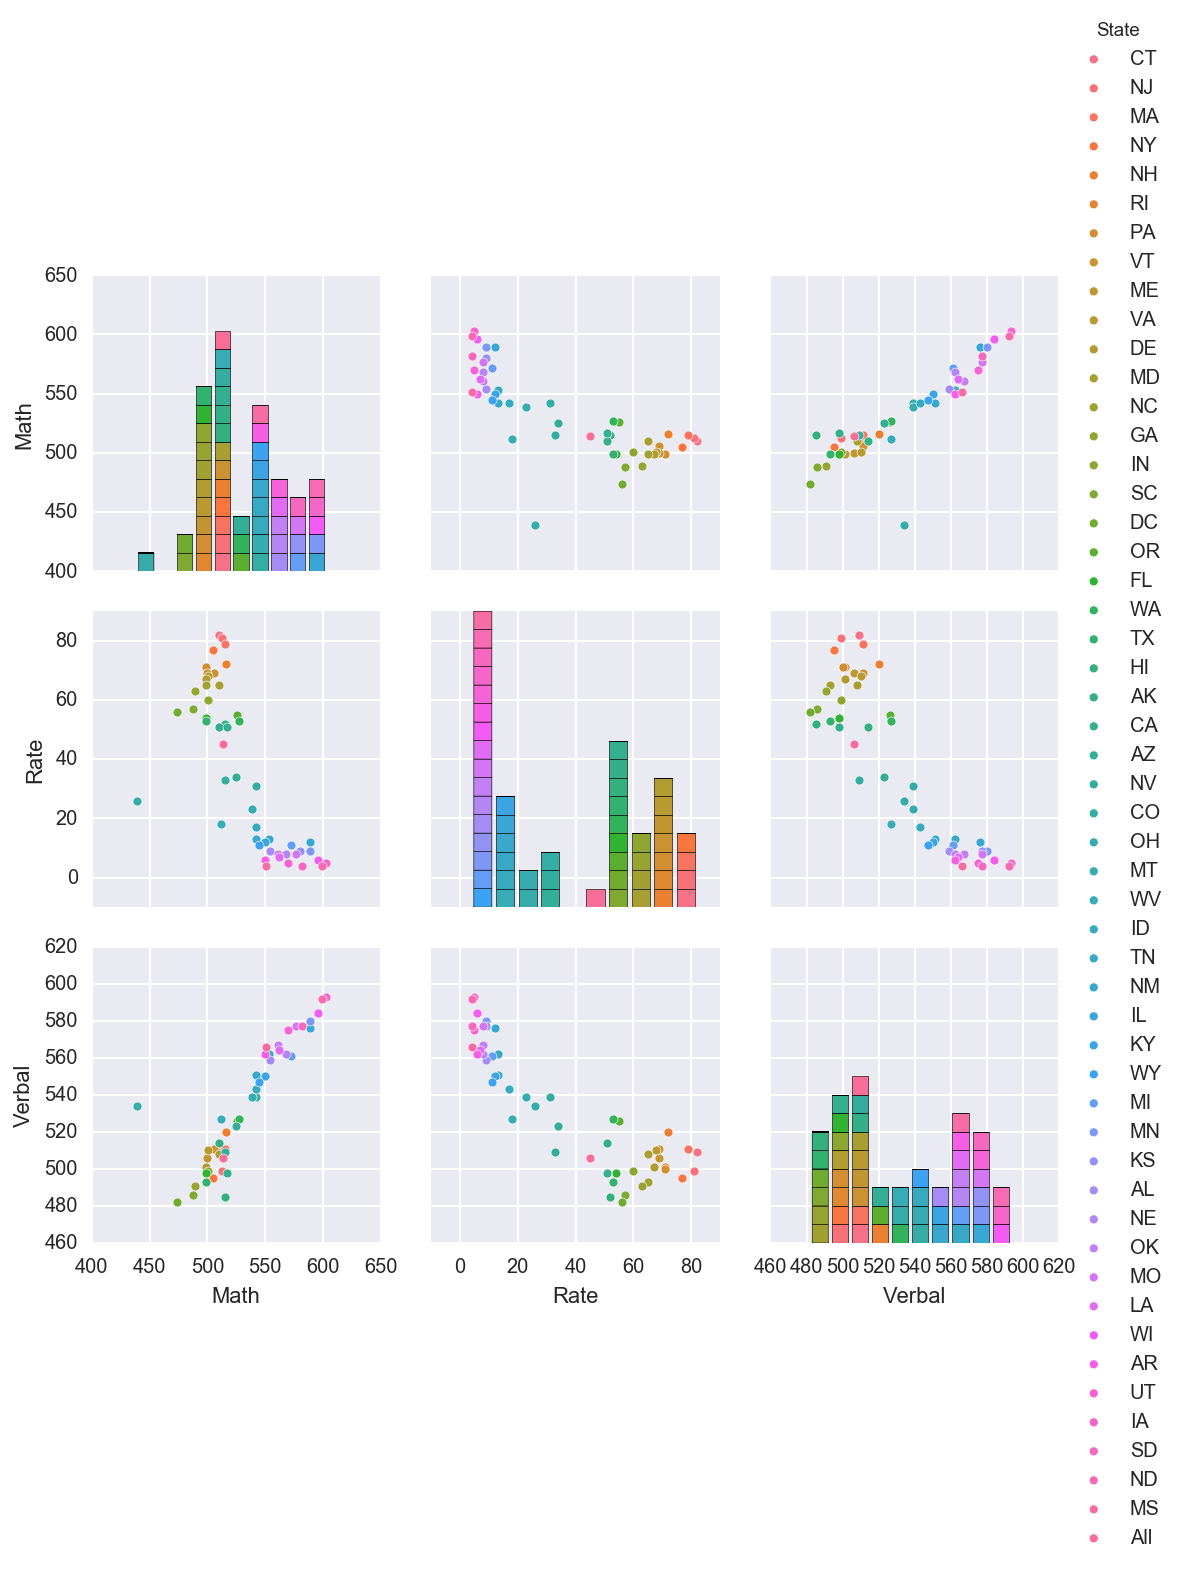

In [9]:
seaborn.pairplot(sd, hue ='State')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

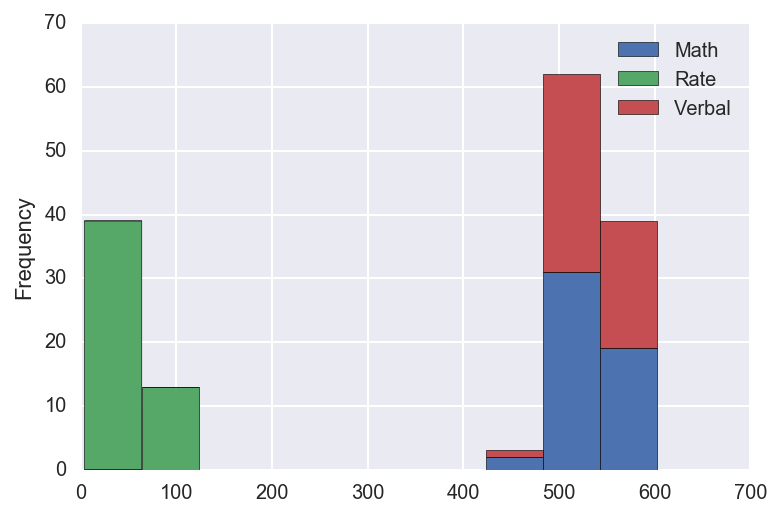

In [10]:
sd.plot.hist(stacked = True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

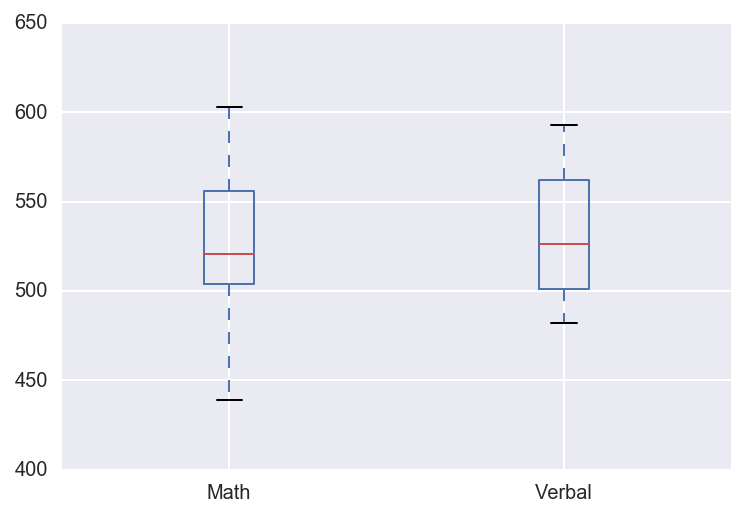

In [13]:
sd[['Math','Verbal']].plot.box(stacked = True)
# the rate needs to be normalized compared to the two other stores.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


     Math  Rate State  Verbal
0   510.0  82.0    CT   509.0
1   513.0  81.0    NJ   499.0
2   515.0  79.0    MA   511.0
3   505.0  77.0    NY   495.0
4   516.0  72.0    NH   520.0
5   499.0  71.0    RI   501.0
6   499.0  71.0    PA   500.0
7   506.0  69.0    VT   511.0
8   500.0  69.0    ME   506.0
9   501.0  68.0    VA   510.0
10  499.0  67.0    DE   501.0
11  510.0  65.0    MD   508.0
12  499.0  65.0    NC   493.0
13  489.0  63.0    GA   491.0
14  501.0  60.0    IN   499.0
15  488.0  57.0    SC   486.0
16  474.0  56.0    DC   482.0
17  526.0  55.0    OR   526.0
18  499.0  54.0    FL   498.0
19  527.0  53.0    WA   527.0
20  499.0  53.0    TX   493.0
21  515.0  52.0    HI   485.0
22  510.0  51.0    AK   514.0
23  517.0  51.0    CA   498.0
24  525.0  34.0    AZ   523.0
25  515.0  33.0    NV   509.0
26  542.0  31.0    CO   539.0
27  439.0  26.0    OH   534.0
28  539.0  23.0    MT   539.0
29  512.0  18.0    WV   527.0
30  542.0  17.0    ID   543.0
31  553.0  13.0    TN   562.0
32  542.0 

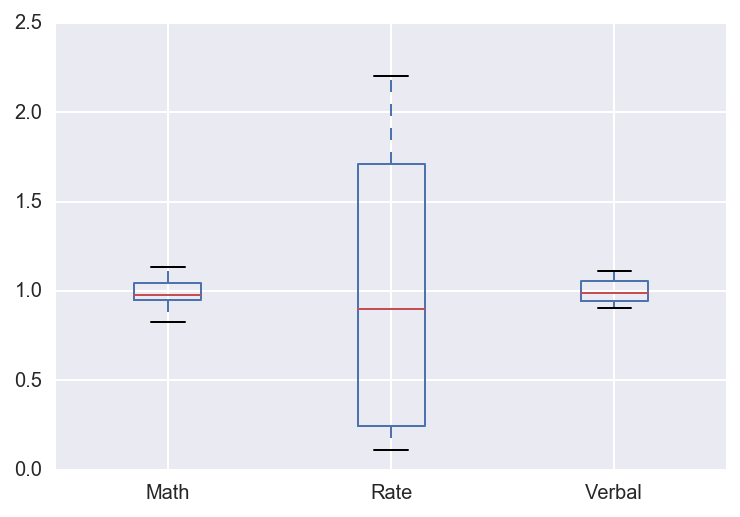

In [14]:
#normalize all the scores:
sd_norm = sd.copy()
sd_norm['Rate'] = sd['Rate']/sd['Rate'].mean()
sd_norm['Verbal'] = sd['Verbal']/sd['Verbal'].mean()
sd_norm['Math'] = sd['Math']/sd['Math'].mean()

sd_norm.plot.box(stacked = True)
print sd
print sd_norm


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [19]:
print sd.loc[:,'Verbal'].mean()
print sd
states5p1 = sd.loc[sd['Verbal'] >sd['Verbal'].mean(),'State']
print states5p1
print len(states5p1)

532.019230769
     Math  Rate State  Verbal
0   510.0  82.0    CT   509.0
1   513.0  81.0    NJ   499.0
2   515.0  79.0    MA   511.0
3   505.0  77.0    NY   495.0
4   516.0  72.0    NH   520.0
5   499.0  71.0    RI   501.0
6   499.0  71.0    PA   500.0
7   506.0  69.0    VT   511.0
8   500.0  69.0    ME   506.0
9   501.0  68.0    VA   510.0
10  499.0  67.0    DE   501.0
11  510.0  65.0    MD   508.0
12  499.0  65.0    NC   493.0
13  489.0  63.0    GA   491.0
14  501.0  60.0    IN   499.0
15  488.0  57.0    SC   486.0
16  474.0  56.0    DC   482.0
17  526.0  55.0    OR   526.0
18  499.0  54.0    FL   498.0
19  527.0  53.0    WA   527.0
20  499.0  53.0    TX   493.0
21  515.0  52.0    HI   485.0
22  510.0  51.0    AK   514.0
23  517.0  51.0    CA   498.0
24  525.0  34.0    AZ   523.0
25  515.0  33.0    NV   509.0
26  542.0  31.0    CO   539.0
27  439.0  26.0    OH   534.0
28  539.0  23.0    MT   539.0
29  512.0  18.0    WV   527.0
30  542.0  17.0    ID   543.0
31  553.0  13.0    TN   56

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
print sd['Verbal'].median()
states5p1 = sd['State'][sd['Verbal'] >sd['Verbal'].median()]
print states5p1
print len(states5p1)

526.5
19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
sd_new = sd.copy()
sd_new['Verbal - Math'] =  sd_new['Verbal']-sd_new['Math']
print sd_new

     Math  Rate State  Verbal  Verbal - Math
0   510.0  82.0    CT   509.0           -1.0
1   513.0  81.0    NJ   499.0          -14.0
2   515.0  79.0    MA   511.0           -4.0
3   505.0  77.0    NY   495.0          -10.0
4   516.0  72.0    NH   520.0            4.0
5   499.0  71.0    RI   501.0            2.0
6   499.0  71.0    PA   500.0            1.0
7   506.0  69.0    VT   511.0            5.0
8   500.0  69.0    ME   506.0            6.0
9   501.0  68.0    VA   510.0            9.0
10  499.0  67.0    DE   501.0            2.0
11  510.0  65.0    MD   508.0           -2.0
12  499.0  65.0    NC   493.0           -6.0
13  489.0  63.0    GA   491.0            2.0
14  501.0  60.0    IN   499.0           -2.0
15  488.0  57.0    SC   486.0           -2.0
16  474.0  56.0    DC   482.0            8.0
17  526.0  55.0    OR   526.0            0.0
18  499.0  54.0    FL   498.0           -1.0
19  527.0  53.0    WA   527.0            0.0
20  499.0  53.0    TX   493.0           -6.0
21  515.0 

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:

top10_mathstrong = sd_new[sd_new['Verbal - Math'] >= 0].sort_values('Verbal - Math', ascending=False).head(10)
top10_verbalstrong = sd_new[sd_new['Verbal - Math'] < 0].sort_values('Verbal - Math', ascending=True).head(10)
print top10_mathstrong.head(3)
print top10_verbalstrong.head(3)

     Math  Rate State  Verbal  Verbal - Math
27  439.0  26.0    OH   534.0           95.0
50  551.0   4.0    MS   566.0           15.0
29  512.0  18.0    WV   527.0           15.0
     Math  Rate State  Verbal  Verbal - Math
21  515.0  52.0    HI   485.0          -30.0
23  517.0  51.0    CA   498.0          -19.0
1   513.0  81.0    NJ   499.0          -14.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [19]:
sd_new.corr()
# correlation shows a strong positive relationship between Verbal and Math (close to 1)
# correlation also shows a strong negative relationship between rate and math (close to -1))

,Math,Rate,Verbal,Verbal - Math
Math,1.000000,-0.773746,0.899871,-0.388219
Rate,-0.773746,1.000000,-0.886432,-0.101412
Verbal,0.899871,-0.886432,1.000000,0.052600
Verbal - Math,-0.388219,-0.101412,0.052600,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [20]:
sd_new.describe()
# if there is a field that is string based, it will not show up in this table
# count is the number of rows. if there is a blank this will be less than the maximum value
# mean is the average value (if numeric)
# min is the lowest value (lower range)
# max is the largest value (upper range)
# 25% / 50% / 75% are the different quartiles based on occurance. 50% would be the median, and 25% would 
# be the "sub median"

,Math,Rate,Verbal,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,531.500000,37.153846,532.019231,0.519231
std,36.014975,27.301788,33.236225,15.729939
min,439.000000,4.000000,482.000000,-30.000000
25%,504.000000,9.000000,501.000000,-6.000000
50%,521.000000,33.500000,526.500000,0.000000
75%,555.750000,63.500000,562.000000,4.250000
max,603.000000,82.000000,593.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [21]:
sd.cov()
# for the verbal explanation see below (i answered in lower problems)

,Math,Rate,Verbal
Math,1297.078431,-760.803922,1077.147059
Rate,-760.803922,745.387632,-804.355958
Verbal,1077.147059,-804.355958,1104.646682


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [21]:
drug_data_filepath = '/Users/tlee010/desktop/DSI-SF-2-timdavidlee/datasets/drug_use_by_age/drug-use-by-age.csv'
drug_data = pd.read_csv(drug_data_filepath)
print drug_data.shape
drug_data.head()
#preliminary tables

(17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [36]:
drug_data.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [38]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

0      35.5
1         -
2       2.0
3       1.0
4      66.5
5      64.0
6      46.0
7     180.0
8      45.0
9      30.0
10     57.5
11     88.0
12     50.0
13     66.0
14    280.0
15     41.0
16    120.0
Name: heroin-frequency, dtype: object

In [93]:
drug_data['cocaine-frequency'].replace(['-'],[0.0],inplace = True)
drug_data['crack-frequency'].replace(['-'],[0.0],inplace = True)
drug_data['heroin-frequency'].replace(['-'],[0.0],inplace = True)
drug_data['inhalant-frequency'].replace(['-'],[0.0],inplace = True)
drug_data['oxycontin-frequency'].replace(['-'],[0.0],inplace = True)
drug_data['meth-frequency'].replace(['-'],[0.0],inplace = True)
drug_data.info()

#drug_data[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']].replace(['-'],[0.0],inplace=True)
#print drug_data[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']]
#print drug_data['cocaine-frequency']

#  data.position.replace(['RB','QB'],['Running Back’, 'Quarterback'],inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [94]:
#there
'''
The following data describes the local drug use in teenagers. They are already summary
statistics with a focus on ages under 21, and then wider banded ages until 65+. They have
roughly 55k samples with roughly 3000 samples per age range recorded, with the exception 
of 35-49 which is 7000. For a range of drugs, two items are recorded for each:

- Use: % of population that uses the product (Y/N)
- Frequency: how often the alcohol (how often)
- Drugs covered: Alcohol, marijuana, cocaine, crack, heroin, hallucinogen, inhalant
, pain-releiver, oxycontin, tranquilizer, stimulant, meth, sedative,

'''
print sum(drug_data['n'])
print drug_data['age'].unique()
drug_data.head()
print drug_data[['age','n']]


55268
['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']
      age     n
0      12  2798
1      13  2757
2      14  2792
3      15  2956
4      16  3058
5      17  3038
6      18  2469
7      19  2223
8      20  2271
9      21  2354
10  22-23  4707
11  24-25  4591
12  26-29  2628
13  30-34  2864
14  35-49  7391
15  50-64  3923
16    65+  2448


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [113]:
# Hypothesis:
# 'Meth and Heroin use is closely correlated on a age profile. 
# deliverables 
# -- correlation comparison of Usage and frequency between the two drugs
# -- a stacked plot by age to look at the two trends
# -- a comparison


hypo_subset = drug_data[['age','n','meth-use','meth-frequency','heroin-use','heroin-frequency']] 
hypo_subset.loc[:,'meth-frequency'] = hypo_subset.loc[:,'meth-frequency'].replace('-','').astype(float)
hypo_subset.loc[:,'heroin-frequency'] = hypo_subset.loc[:,'heroin-frequency'].replace('-','').astype(float)


print hypo_subset

      age     n  meth-use  meth-frequency  heroin-use  heroin-frequency
0      12  2798       0.0             0.0         0.1              35.5
1      13  2757       0.1             5.0         0.0               0.0
2      14  2792       0.1            24.0         0.1               2.0
3      15  2956       0.3            10.5         0.2               1.0
4      16  3058       0.3            36.0         0.1              66.5
5      17  3038       0.6            48.0         0.1              64.0
6      18  2469       0.5            12.0         0.4              46.0
7      19  2223       0.4           105.0         0.5             180.0
8      20  2271       0.9            12.0         0.9              45.0
9      21  2354       0.6             2.0         0.6              30.0
10  22-23  4707       0.6            46.0         1.1              57.5
11  24-25  4591       0.7            21.0         0.7              88.0
12  26-29  2628       0.6            30.0         0.6           

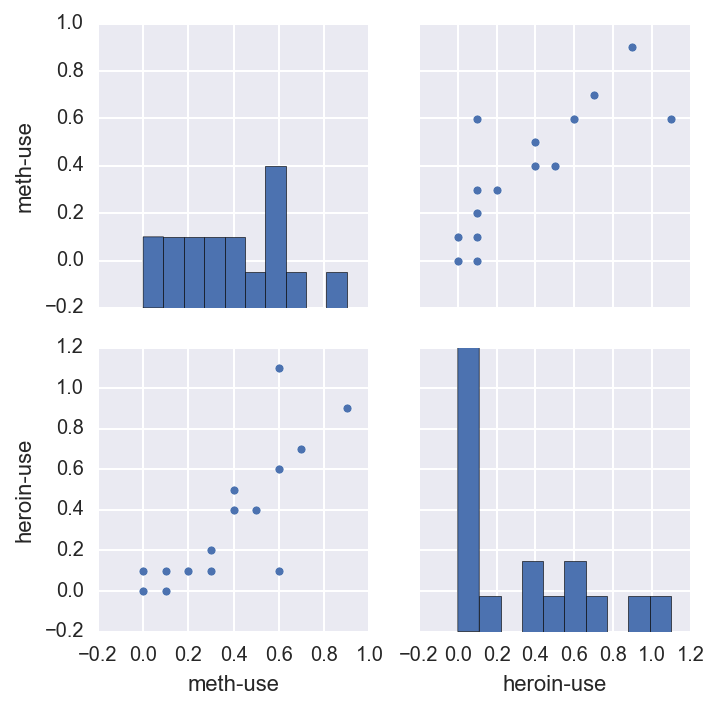

In [114]:
sns.pairplot(hypo_subset[['meth-use','heroin-use']])
# there's a strong correlation across age groups 
# on the upper right and lower left charts there's almost a linear correlation
# there's almost a straight line which indicates a strong connection

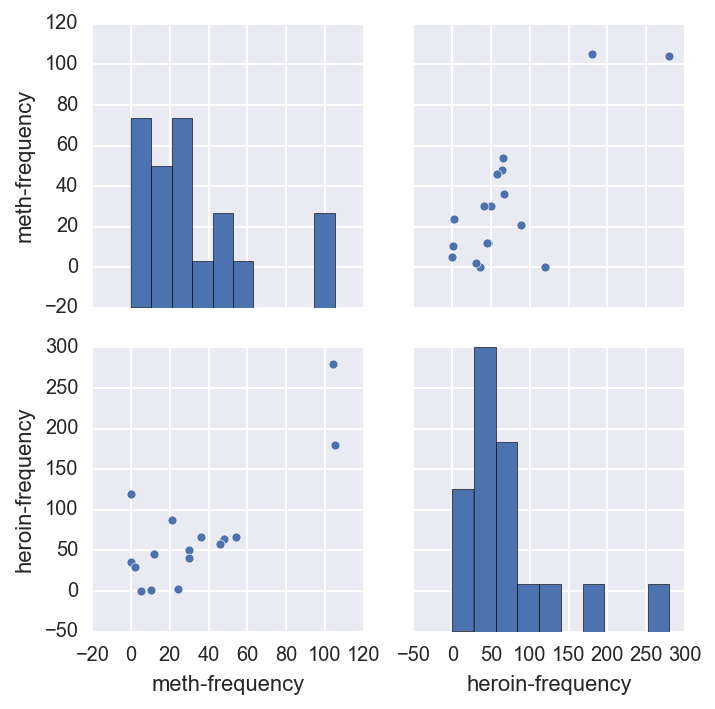

In [115]:
sns.pairplot(hypo_subset[['meth-frequency','heroin-frequency']])
# the correlation of frequency is not as strong across age groups, but it is still very linear-like
# as a result, if we had to classify the drugs, these two would have very similiar characteristics

In [ ]:
# CONCLUSION: 
# there is a strong correlation between meth and heroin use. The data
# is summarized, so its hard to infer any time-related conclusions or 
# if the users of these drugs are the same people doing 2 drugs
# or two individuals doing a drug each, but the behavior is very similar
# 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

In [79]:
print sd.corr()
#2
# Correlation is the rate or the strength of relationship between any of the two different
# variables. So if it is strongly correlated , it would be a value of 1, if negatively -1,
# and if not correlated at all, it would be a correlated rate of 0

print sd.cov()
# Covariance - is the rate which two variables change together.  Positive values mean
# taht they change together. Negative means they change inversely.
#Since these values aren't normalized, it also shows the strength
# in which they change. 

# Covariance is preferred because the interdepency factor between the difference aspects is normalized and
# the metric is easier to understand. Between 1 and -1, so its very easy to see what has a strong correlation
# and what has a weak one

               Math        Rate       Verbal
Math    1297.078431 -760.803922  1077.147059
Rate    -760.803922  745.387632  -804.355958
Verbal  1077.147059 -804.355958  1104.646682
            Math      Rate    Verbal
Math    1.000000 -0.773746  0.899871
Rate   -0.773746  1.000000 -0.886432
Verbal  0.899871 -0.886432  1.000000


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



In [ ]:
#1 - covariance is calculated by the following: for two data sets X and Y. Each point is compared to its relative mean
# so each point in X is compared to mean_X, and same for Y. For each point these diff_X is multiplied to diff_Y and
# then all summed together. Finally this is divided by the overall sample size. The idea is that per point, 
# you have a combined X / Y variance from the relative mean. If this combined factor is small, that means on average,
# most points are right on the mean
# if the combined factor is large, that means both dimensions vary widely at the same time, and are related

#2. - correlation is a very similar calculation. For each point the diff_X from the mean_X and diff_Y from mean_Y
# is normalized against the standard error which is calculated by sqrt(var^2/m). This results in a 
# per point "relative error" to the "normalized squared error"
#
# correlation then compares this "relative" error of both X and Y dimensions together

#3. the primary difference between the two is Correlation = Covariance / std(X) / std(y)

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

In [95]:
X = [1,2,3,4,5,6]
Y = [6,1,2,3,4,10]

def mycov(X,Y):
    array_X = np.array(X)
    array_Y = np.array(Y)

    cov = (array_X - array_X.mean())*(array_Y - array_Y.mean())/len(X)
    return np.sum(cov)

def mycor(X,Y):
    array_X = np.array(X)
    array_Y = np.array(Y)
    
    cor = (array_X - array_X.mean())*(array_Y - array_Y.mean())/len(X)/np.std(array_X) /np.std(array_Y)
    return np.sum(cor)

print mycov(X,Y)
print np.cov(X,Y,bias=True)
print mycor(X,Y)
print np.corrcoef(X,Y)

2.5
[[ 2.91666667  2.5       ]
 [ 2.5         8.88888889]]
0.490990253031
[[ 1.          0.49099025]
 [ 0.49099025  1.        ]]


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [ ]:
# pearson calculation is based on fractional ranks.
# numbers are sorted and then a rank is applied
# by the order. If the number is repeated, then
# the rank is split. so 1 1 2 would be rank 1.5 1.5 3 
# this number ranking is used. This formula is used
# to compensate for outliers

# assuming that all the sets are integers
# two datasets are ranked. At each point the (X,Y) the ranks
# are compared and hte difference is recorded. 
# so X's rank in the X set and Y's rank in the Y set

# if the rank is the same the difference is zero
# and the formula becomes 1-0 = 1 which is completely correlated

#otherwise the difference between the rank at anypoint is squared
# then added up
# multiplied by 6
# divided by number of samples
# divided by number of samples ^2-1

#then the above is subtracted from 1

### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [152]:
import scipy.stats as scs

def convertz(x):
    return scs.percentileofscore(sd.Rate,x)

sd['percentile'] = sd['Rate'].map(convertz)
sd.head()

#2
print sd[sd['State']=='CA'].sort_values('Rate')

#3 - percentile is basically the 1-100 range of rank
# instead of actually rankings from 1... n samples
# its using the %. That way its more universal between
# different sized sets

     Math  Rate State  Verbal  percentile
23  517.0  51.0    CA   498.0   56.730769


### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

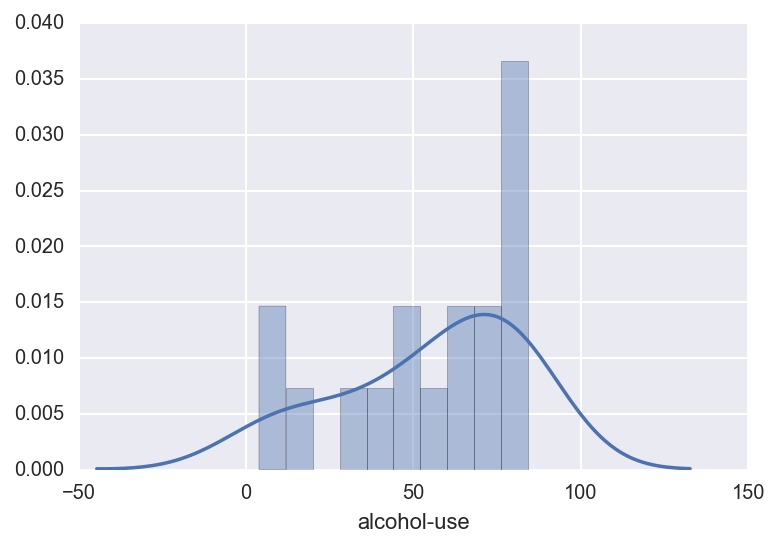

In [161]:
#1 percentile is useful for outliers because it will reduce
# large outliers. The original correlation coefficient
# is based on difference from the mean

# one large value can throw off the whole correlation calc
# with rank, no matter how far of it is, it will always be 
# last rank, so the impact is minimized
import matplotlib.pyplot as plt
def convertz2(x):
    return scs.percentileofscore(drug_data['alcohol-use'],x)

distplot(drug_data['alcohol-use'],bins=10)

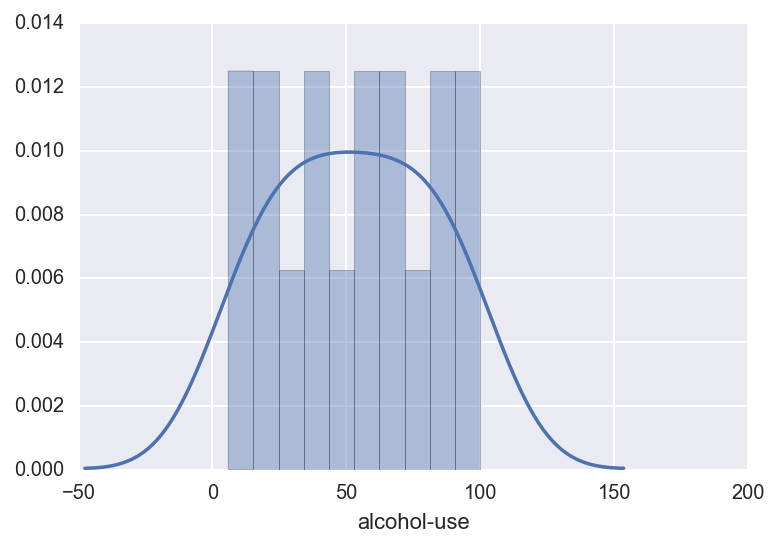

In [162]:
distplot(drug_data['alcohol-use'].map(convertz2),bins=10)

In [ ]:
#4 as noted the pearson rank smoothes out the curve,
# so that one outlying group will not have that much of an effect